In [ ]:
# https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler

# Normalisation
# The idea behind StandardScaler is that it will transform your data such that its distribution will have 
# a mean value 0 and standard deviation of 1.
# In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
# Given the distribution of the data, each value in the dataset will have the mean value subtracted, 
# and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

# StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale. 
# For e.g. an Employee dataset will contain AGE column with values on scale 20-70 and SALARY column with values on scale 
# 10000-80000.
# As these two columns are different in scale, they are Standardized to have common scale while building machine learning model.

# Accuracy score 
# https://wiki.cloudfactory.com/docs/mp-wiki/metrics/accuracy#:~:text=The%20best%20possible%20value%20is,score%20as%20the%20poor%20one.

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

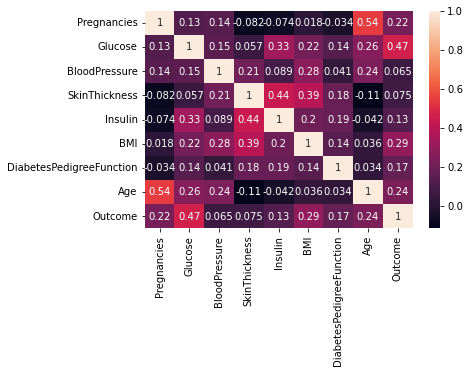

In [9]:
sns.heatmap(data.corr(), annot=True)

In [10]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
# How many people are diabetic

data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
data['Outcome'].value_counts(normalize=True) * 100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [15]:
data['Pregnancies'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17],
      dtype=int64)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

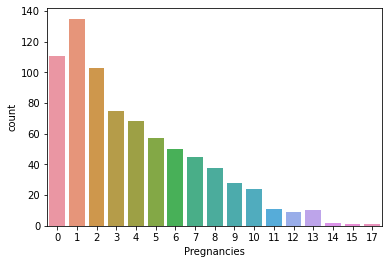

In [18]:
sns.countplot(data=data, x='Pregnancies')

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

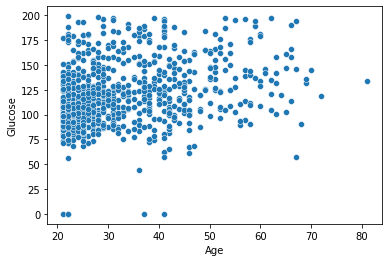

In [22]:
sns.scatterplot(data=data, x='Age', y='Glucose')

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

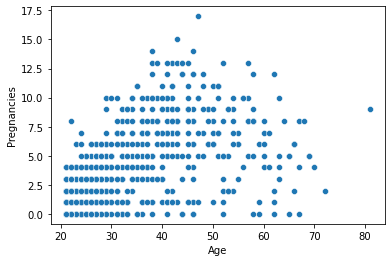

In [25]:
sns.scatterplot(data=data, x='Age', y='Pregnancies')

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

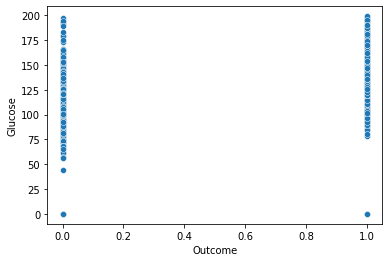

In [27]:
sns.scatterplot(data=data, x='Outcome', y='Glucose')

In [28]:
# Split the data

In [29]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
# Normalisation of the input, meaning each column has a zero mean and standar deviation as 1

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [35]:
np.mean(X_train)

C:\Users\go27s\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Pregnancies                   3.899023
Glucose                     121.936482
BloodPressure                69.060261
SkinThickness                20.258958
Insulin                      82.048860
BMI                          31.810423
DiabetesPedigreeFunction      0.475454
Age                          33.213355
dtype: float64

In [36]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [43]:
np.mean(X_train, axis=0)

array([-2.60378038e-17,  1.73585359e-17,  6.65410542e-17,  3.76101611e-17,
       -7.23272329e-17,  2.71950396e-16,  1.64906091e-16, -2.87862387e-16])

In [44]:
np.std(X_train,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [45]:
# Initialise the model

In [46]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Evaluation of the model

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test, log.predict(X_test))

0.7662337662337663

In [ ]:
# Accuracy > 0.9 as an excellent score, Accuracy > 0.7 as a good one, and any other score as the poor one